In [1]:
import json
import pymongo
from pymongo import MongoClient



client = MongoClient('mongodb://localhost:27017/')
print(client.address, "Port =", client.PORT, "Host =", client.HOST, client.next)
#run this to have greetings

('localhost', 27017) Port = 27017 Host = localhost <bound method MongoClient.__next__ of MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)>


In [2]:
dbs = client.list_database_names()
#[db for db in dbs]
#% Now let's create a new database called cinema
mydb = client["cinema"]

In [3]:
dblist = client.list_database_names()
if "cinema" in dblist:
    print("The database exists.")

The database exists.


In [4]:
mycol = mydb["movies"]

In [4]:
addedCollection = mydb.list_collection_names()
if "movies" in addedCollection:
    print("Hey don't  WORRY movies  Collection is added successfully")
else:
    print("It seems like your collection hasn't been added")

Hey don't  WORRY movies  Collection is added successfully


In [6]:
import pandas as pd
import json

datafile = pd.read_csv("datsets/movies.csv")

In [7]:
datafile.head()

,_id,awards.nominations,awards.text,awards.wins,cast,directors,genres,languages,lastupdated,rated,released,title,year
0,61636ec15dae1c1507e1f172,63,Won 11 Oscars. Another 116 wins & 63 nominations.,127,"[""Leonardo DiCaprio"",""Kate Winslet"",""Billy Zan...","[""James Cameron""]","[""Drama"",""Romance""]","[""English"",""French"",""German"",""Swedish"",""Italia...",NaN,PG-13,1997-12-19T00:00:00.000Z,Titanic,1997
1,61636ec15dae1c1507e1f173,106,Won 2 Oscars. Another 142 wins & 106 nominations.,144,"[""Christian Bale"",""Heath Ledger"",""Aaron Eckhar...","[""Christopher Nolan""]","[""Action"",""Crime"",""Drama""]","[""English"",""Mandarin""]",NaN,PG-13,2008-07-18T00:00:00.000Z,The Dark Knight,2008
2,61636ec15dae1c1507e1f174,22,Won 1 Oscar. Another 51 wins & 22 nominations.,52,"[""Rumi Hiiragi"",""Miyu Irino"",""Mari Natsuki"",""T...","[""Hayao Miyazaki""]","[""Animation"",""Adventure"",""Family""]","[""Japanese""]",NaN,PG,2003-03-28T00:00:00.000Z,Spirited Away,2001
3,61636ec15dae1c1507e1f175,6,Won 3 Oscars. Another 6 wins & 6 nominations.,9,"[""Humphrey Bogart"",""Ingrid Bergman"",""Paul Henr...","[""Michael Curtiz""]","[""Drama"",""Romance"",""War""]","[""English"",""French"",""German"",""Italian""]",2015-09-04 00:22:54.600000000,PG,1943-01-23T00:00:00.000Z,Casablanca,1942


In [8]:
datafile.tail()

,_id,awards.nominations,awards.text,awards.wins,cast,directors,genres,languages,lastupdated,rated,released,title,year
0,61636ec15dae1c1507e1f172,63,Won 11 Oscars. Another 116 wins & 63 nominations.,127,"[""Leonardo DiCaprio"",""Kate Winslet"",""Billy Zan...","[""James Cameron""]","[""Drama"",""Romance""]","[""English"",""French"",""German"",""Swedish"",""Italia...",NaN,PG-13,1997-12-19T00:00:00.000Z,Titanic,1997
1,61636ec15dae1c1507e1f173,106,Won 2 Oscars. Another 142 wins & 106 nominations.,144,"[""Christian Bale"",""Heath Ledger"",""Aaron Eckhar...","[""Christopher Nolan""]","[""Action"",""Crime"",""Drama""]","[""English"",""Mandarin""]",NaN,PG-13,2008-07-18T00:00:00.000Z,The Dark Knight,2008
2,61636ec15dae1c1507e1f174,22,Won 1 Oscar. Another 51 wins & 22 nominations.,52,"[""Rumi Hiiragi"",""Miyu Irino"",""Mari Natsuki"",""T...","[""Hayao Miyazaki""]","[""Animation"",""Adventure"",""Family""]","[""Japanese""]",NaN,PG,2003-03-28T00:00:00.000Z,Spirited Away,2001
3,61636ec15dae1c1507e1f175,6,Won 3 Oscars. Another 6 wins & 6 nominations.,9,"[""Humphrey Bogart"",""Ingrid Bergman"",""Paul Henr...","[""Michael Curtiz""]","[""Drama"",""Romance"",""War""]","[""English"",""French"",""German"",""Italian""]",2015-09-04 00:22:54.600000000,PG,1943-01-23T00:00:00.000Z,Casablanca,1942


In [9]:
data = datafile.to_dict(orient="records")

In [10]:
data

[{'_id': '61636ec15dae1c1507e1f172',
  'awards.nominations': 63,
  'awards.text': 'Won 11 Oscars. Another 116 wins & 63 nominations.',
  'awards.wins': 127,
  'cast': '["Leonardo DiCaprio","Kate Winslet","Billy Zane","Kathy Bates"]',
  'directors': '["James Cameron"]',
  'genres': '["Drama","Romance"]',
  'languages': '["English","French","German","Swedish","Italian","Russian"]',
  'lastupdated': nan,
  'rated': 'PG-13',
  'released': '1997-12-19T00:00:00.000Z',
  'title': 'Titanic',
  'year': 1997},
 {'_id': '61636ec15dae1c1507e1f173',
  'awards.nominations': 106,
  'awards.text': 'Won 2 Oscars. Another 142 wins & 106 nominations.',
  'awards.wins': 144,
  'cast': '["Christian Bale","Heath Ledger","Aaron Eckhart","Michael Caine"]',
  'directors': '["Christopher Nolan"]',
  'genres': '["Action","Crime","Drama"]',
  'languages': '["English","Mandarin"]',
  'lastupdated': nan,
  'rated': 'PG-13',
  'released': '2008-07-18T00:00:00.000Z',
  'title': 'The Dark Knight',
  'year': 2008},
 {'

In [11]:
mydb.movies.insert_many(data)

BulkWriteError: batch op errors occurred, full error: {'writeErrors': [{'index': 0, 'code': 11000, 'keyPattern': {'_id': 1}, 'keyValue': {'_id': '61636ec15dae1c1507e1f172'}, 'errmsg': 'E11000 duplicate key error collection: cinema.movies index: _id_ dup key: { _id: "61636ec15dae1c1507e1f172" }', 'op': {'_id': '61636ec15dae1c1507e1f172', 'awards.nominations': 63, 'awards.text': 'Won 11 Oscars. Another 116 wins & 63 nominations.', 'awards.wins': 127, 'cast': '["Leonardo DiCaprio","Kate Winslet","Billy Zane","Kathy Bates"]', 'directors': '["James Cameron"]', 'genres': '["Drama","Romance"]', 'languages': '["English","French","German","Swedish","Italian","Russian"]', 'lastupdated': nan, 'rated': 'PG-13', 'released': '1997-12-19T00:00:00.000Z', 'title': 'Titanic', 'year': 1997}}], 'writeConcernErrors': [], 'nInserted': 0, 'nUpserted': 0, 'nMatched': 0, 'nModified': 0, 'nRemoved': 0, 'upserted': []}

In [ ]:
print(mydb.collection_names())

In [ ]:
newmovie1 = {
    "awards.nominations": 63,
    "awards.text": "Won 11 Oscars. Another 116 wins & 63 nominations.",
    "awards.wins": 127,
    "cast": ["Leonardo DiCaprio", "Kate Winslet", "Billy Zane", "Kathy Bates"],
    "directors": ["James Cameron"],
    "genres": ["Drama", "Romance"],
    "languages": ["English", "French", "German", "Swedish", "Italian", "Russian"],
    "lastupdated": 2010,
    "rated": "PG-13",
    "released": "1997-12-19T00:00:00.000Z",
    "title": "Titanic",
    "year": "1997"
}
mydb.movies.insert_one(newmovie1)

In [ ]:
moviesList = [{
    "awards.nominations": 63,
    "awards.text": "Won 20 Oscars. Another 50 wins & 50 nominations.",
    "awards.wins": 200,
    "cast": ["Kathy Bates"],
    "directors": ["James Cameron"],
    "genres": ["Drama", "fight"],
    "languages": ["French", "German", ],
    "lastupdated": 1998,
    "rated": "PG-20",
    "released": "1997-12-19T00:00:00.000Z",
    "title": "head shot",
    "year": "1997"
}, {
    "awards.nominations": 9,
    "awards.text": "Won 11 Oscars. Another 116 wins & 63 nominations.",
    "awards.wins": 3,
    "cast": ["Kate Winslet", "Billy Zane", "Kathy Bates"],
    "directors": ["Billy Zane Cameron"],
    "genres": ["Drama", "action", "adrenaline"],
    "languages": ["English", "French", ],
    "lastupdated": 2019,
    "rated": "PG-13",
    "released": "1997-12-19T00:00:00.000Z",
    "title": "Now you see me",
    "year": "2011"
}, {
    "awards.nominations": 20,
    "awards.text": "Won 11 Oscars. Another 116 wins & 63 nominations.",
    "awards.wins": 50,
    "cast": ["Leonardo DiCaprio", "Kate Winslet", "Billy Zane", "Kathy Bates"],
    "directors": ["James Cameron"],
    "genres": ["Drama", "Romance"],
    "languages": ["English", "French", "German", "Swedish", "Italian", "Russian"],
    "lastupdated": 2020,
    "rated": "PG-13",
    "released": "1997-12-19T00:00:00.000Z",
    "title": "catch me if you can",
    "year": "1993"
}, {
    "awards.nominations": 19,
    "awards.text": "Won 11 Oscars. Another 50 wins & 63 nominations.",
    "awards.wins": 20,
    "cast": ["Leonardo DiCaprio", "Kathy Bates"],
    "directors": ["James Cameron"],
    "genres": ["Drama", "Romance"],
    "languages": ["German", "Swedish", "Italian"],
    "lastupdated": 2020,
    "rated": "PG-13",
    "released": "1997-12-19T00:00:00.000Z",
    "title": "can you hear me ",
    "year": "1999"
}, ]
mydb.movies.insert_many(moviesList)

In [ ]:
movie1 = mydb.movies.find_one({"year": "1999"})
print(movie1)

In [ ]:
movies1997 = mydb.movies.find({"year": "1997"})
#print all the the films that has been done in 1997
[movie for movie in movies1997]

In [ ]:
print("the number of the movies in the databse are ", mydb.movies.count())

In [ ]:
print("we have ", mydb.movies.find({"lastupdated": 2020}).count(), "updated in 2020")

In [ ]:
result = mydb.movies.update_many({"year": "1999"}, {"$inc": {"awards.wins": 10}})
print("The number of the updates collection is \n ", result.matched_count)

In [ ]:
result = mydb.movies.update_one({"title": "catch me if you can"}, {"$set": {"awards.nominations": "200"}})
if result.acknowledged == "true":
    print("update  is done  \n ")
else:
    print("no document wih the following criteria")

In [5]:
# iterate throught the list using pyhton iter
moviesTitles = mydb.movies.distinct("title")
print("all the movies titles")
list(iter([moviesTitles]))

all the movies titles


[['Casablanca',
  'Now you see me',
  'Spirited Away',
  'THE Titanic',
  'THE Titanic film',
  'The Dark Knight',
  'can you hear me ',
  'catch me if you can',
  'head shot']]

In [ ]:
print("the number of movies that has  awards.wins  > 20  is  : \n",
      mydb.movies.find({"awards.wins": {'$gt': 20}}).count())

In [ ]:
movies2022 = mydb.movies.find({"lastupdated": {"$lte": 2022}})
print("movies found updated before 2022 \n ")
[movie for movie in movies2022]

In [ ]:
print("movies  aren't updated in 2020")
movies2022 = mydb.movies.find({"lastupdated": {"$ne": 2020}})
[movie for movie in movies2022]

In [ ]:
moviess = mydb.movies.find({"lastupdated": {"$in": [2019, 2020]}})
print("movies updated in 2019 and 2020")
[movie for movie in moviess]


In [ ]:
moviess = mydb.movies.find({"lastupdated": {"$nin": [2015, 2011]}})
print("movies  updated date is in 2015 and 2011 :\n")
[movie for movie in moviess]


In [ ]:
moviess = mydb.movies.find({"title": {"$not": {"$eq": "can you hear me "}}})
print("Movies  where the title is not equal to  can you hear me")
it = iter(moviess)
i = 0
while it.__next__():
    i = i + 1
    print("Movie number :", i, it.next())

In [ ]:
moviess = mydb.movies.find({"$or": [{"year": "1999"}, {"lastupdated": {"$nin": [2015, 2011]}}]})
print("movies are \n ")
num = 0
for i in moviess:
    num = num + 1
    print("Movie number ", num, i)


In [ ]:
moviess = mydb.movies.find(
    {"$nor": [{"year": "2011"}, {"lastupdated": {"$nin": [2005, 2006]}}, {"awards.nominations": {"$gte": 10}}]})
[movie for movie in moviess]

In [ ]:
#the year must be less than 2022 or the "awards.wins" is less than 50
# AND the rate must be PG-13
# Or  the title is not equal  to "can you hear me "
from bson.json_util import dumps
from bson.json_util import loads

moviess = mydb.movies.find({
    "$and": [
        {"$or": [{"year": {"$lt": 2022}}, {"awards.wins": {"$lte": 50}}]},
        {"$or": [{"rated": "PG-13"}, {"title": {"$not": {"$eq": "can you hear me "}}}]},
    ]
}).limit(1)
print(loads(dumps(moviess)))

In [ ]:
#their year is has string type
# and their title exists
# Skip  the first one and limit the result by 3 items(movies )
results = mydb.movies.find({"$and": [{"year": {"$type": "string"}}, {"title": {"$exists": "true"}}]}).skip(1).limit(3)
print(" the result of the 3 movies is \n")
[i for i in results]

In [ ]:
#that their year is has string type  and the title exists
result = mydb.movies.find({"$and": [{"year": {"$type": "string"}}, {"title": {"$exists": "true"}}]}).next()
print(result)

In [ ]:
try:
    upatedfilm = mydb.movies.update_one({"title": "Titanic"}, {"$set": {"title": "THE Titanic film"}})
    if upatedfilm.modified_count >= 1:
        print("The Movie Name updated successully")
    else:
        print("This movie name doesn't exist")
except SyntaxError as s:
    print("None of the data found to be updated ", s)

In [ ]:
# don't  forget to catch erros
try:
    res = mydb.movies.replace_one({"_id": "61636ec15dae1c1507e1f172"}, {"awards.nominations": 63,
                                                                        "awards.text": "Won 11 Oscars. Another 116 wins & 63 nominations.",
                                                                        "awards.wins": 127,
                                                                        "cast": ["Leonardo DiCaprio", "Kate Winslet",
                                                                                 "Billy Zane", "Kathy Bates"],
                                                                        "directors": ["James Cameron"],
                                                                        "genres": ["Drama", "Romance"],
                                                                        "languages": ["English", "French", "German",
                                                                                      "Swedish", "Italian", "Russian"],
                                                                        "lastupdated": 1998,
                                                                        "rated": "PG-13",
                                                                        "released": "1997-12-19T00:00:00.000Z",
                                                                        "title": "THE Titanic",
                                                                        "year": 1997})
    if res.modified_count >= 1:
        print("The Movie with the id 61636ec15dae1c1507e1f172  has been replaced with a new info")
    else:
        print("This movie with the id 61636ec15dae1c1507e1f172 doesn't  try another id ")
except IndexError as i:
    print("No data can be managed", i)

In [ ]:
try:
    updateResult = mydb.movies.update_many({}, {"$inc": {"awards.wins": 10}})
    if updateResult.raw_result:
        print("Number of documents updated is :\n")
        print(updateResult.matched_count)
    else:
        print(" 0 movies  updated")
except Exception as e:
    print("An exception occurred ::", e)

finally:
    print("The  update  is Done ! ")

In [ ]:
try:
    updateResult = mydb.movies.update_many({"year": {"$gte": 1997}},
                                           {"$inc": {"awards.wins": 10}}, )
    print("Number of documents updated on the MongoDB collection movies:")
    print(updateResult.matched_count)
except Exception as e:
    print("An exception occurred ::", e)
finally:
    print("The  update  is Done ! ")

In [ ]:
try:
    updateResult = mydb.movies.update_many({"languages": {"$size": 6, "$all": ["French"]}},
                                           {"$push": {"languages": "arabic", }})
    print("Number of documents updated on the MongoDB collection movies:")
    print(updateResult.matched_count)
except Exception as e:
    print("An exception occurred ::", e)
finally:
    print(" The  update  is Done ! ")

In [ ]:
try:
    updateResult = mydb.movies.update_many({"genres": {"$size": 1}, },
                                           {"$push": {"genres": {"$each": ['ACtion'], "$position": 0}}})
    print("Number of documents updated on the  movies collection: ")
    print(updateResult.matched_count)
except Exception as e:
    print("An exception occurred ::", e)
finally:
    print(" The  update  is Done ! ")

In [ ]:
#The MONGO AGGREGATION FRAMEWORK
#Now we are going to connect  to the shared cluster of mongo db and create a new database called movie with a new big schema

In [8]:
from pymongo.errors import OperationFailure
from pymongo import MongoClient

try:
    client = MongoClient('mongodb://localhost:27017/')
except pymongo.errors.ConnectionFailure as e:
    print("Could not connect to server:", e)

In [9]:
client.database_names()

C:\Users\HAITHE~1\AppData\Local\Temp/ipykernel_18292/4168174577.py:1: DeprecationWarning: database_names is deprecated. Use list_database_names instead.
  client.database_names()


['admin',
 'blog',
 'cinema',
 'config',
 'demodb',
 'local',
 'mongodbVSCodePlaygroundDB',
 'myfirstdb']

In [10]:
mydb = client["cinema"]
try:
    with open('C:/Users/Haithem Mihoubi/m121/movie.json') as file:
        file_data = json.load(file)
        mydb.movie.insert_many(file_data)
except EOFError as e:
    print("Eroor has been occured ", e)
finally:
    print(" Operation has been ended ")

 Operation has been ended 


NameError: name 'json' is not defined

In [12]:
#Problem:
#Help MongoDB pick a movie our next movie night! Based on employee polling, we've decided that potential movies must meet the following criteria.
#imdb.rating is at least 7
#genres does not contain "Crime" or "Horror"
#rated is either "PG" or "G"
#languages contains "English" and "Japanese"
# show just the "title" and the rated  field
# catch the errors and th exceptions and indicate that the operataion is done
#  the data will be  represented as Movie number 1  with title = 5 and rated = 6
try:
    documentreturned = mydb.movie.aggregate([{
        "$match": {
            "imdb.rating": {"$gte": 7},
            "genres": {"$nin": ["Crime", "Horror"]},
            "rated": {"$in": ["PG", "G"]},
            "$and": [
                {"languages": "English"},
                {"languages": "Japanese"}]
        }}, {
        "$project": {
            "_id": 0,
            "title": 1,
            "rated": 1
        }
    }])
    i = 0
    for movie in documentreturned:
        i = i + 1
        jsonMovie = json.dumps(movie)
        docMovie = json.loads(jsonMovie)
        print("THE MOVIE NUMBER  ", i, "TITLE = ", docMovie['title'], " IS Rated ", docMovie['rated'])

except BaseException as e:
    print("exception", e)
finally:
    print("THIS IS THE END OF THE OPERATION  ")





THE MOVIE NUMBER   1 TITLE =  Those Magnificent Men in Their Flying Machines or How I Flew from London to Paris in 25 hours 11 minutes  IS Rated  G
THE MOVIE NUMBER   2 TITLE =  Tora! Tora! Tora!  IS Rated  G
THE MOVIE NUMBER   3 TITLE =  The Goodbye Girl  IS Rated  PG
THE MOVIE NUMBER   4 TITLE =  Local Hero  IS Rated  PG
THE MOVIE NUMBER   5 TITLE =  The Karate Kid  IS Rated  PG
THE MOVIE NUMBER   6 TITLE =  The Transformers: The Movie  IS Rated  PG
THE MOVIE NUMBER   7 TITLE =  Empire of the Sun  IS Rated  PG
THE MOVIE NUMBER   8 TITLE =  Dreams  IS Rated  PG
THE MOVIE NUMBER   9 TITLE =  Defending Your Life  IS Rated  PG
THE MOVIE NUMBER   10 TITLE =  Millennium Actress  IS Rated  PG
THE MOVIE NUMBER   11 TITLE =  Cars  IS Rated  G
THE MOVIE NUMBER   12 TITLE =  The Cat Returns  IS Rated  G
THE MOVIE NUMBER   13 TITLE =  Life of Pi  IS Rated  PG
THE MOVIE NUMBER   14 TITLE =  In the Shadow of the Moon  IS Rated  PG
THE MOVIE NUMBER   15 TITLE =  Babies  IS Rated  PG
THE MOVIE NUMBE

In [ ]:
##year is at least 1995
# the genres is  "Crime"or "Horror"
# project only the title and the rating in  a filed called  "The imdb Rating  is " with the value of the imdb rating
try:
    documentreturned = mydb.movie.aggregate([{
        "$match": {
            "genres": {"$in": ["Crime", "Horror"]},
            "year": {"$gte": 1995},

        }}, {
        "$project": {
            "_id": 0,
            "title": 1,
            "The imdb Rating  is ": "$imdb.rating"
        }
    }])
    if documentreturned.next:
        i = 0
        for movie in documentreturned:
            i = i + 1
            jsonMovie = json.dumps(movie)
            docMovie = json.loads(jsonMovie)
            print("THE MOVIE NUMBER  ", i, "TITLE = ", docMovie['title'], " The imdb Rating  is    ",
                  docMovie["The imdb Rating  is "])
    else:
        print(" No movie found wiht the following criteria ")
except BaseException as e:
    print("exception", e)
finally:
    print("THIS IS THE END OF THE OPERATION  ")


In [ ]:
#the awards wins are a least 1
# multiply the imdb rating + the tomatoes viewer number of reviewes  by 2 and
# project a field called the average rating
try:
    docsfound = mydb.movie.aggregate([
        {
            "$match": {
                "awards.wins": {"$gte": 1}
            }
        },
        {
            "$project": {
                "_id": 0,
                "title": 1,
                "the average rating": {
                    "$multiply": [
                        {"$sum": ["$imdb.rating", "$tomatoes.viewer.numReviews"]
                         }, 2]
                }
            }
        }
    ]
    )
    if docsfound.next:
        i = 0
        for movie in docsfound:
            i = i + 1
            jsonMovie = json.dumps(movie)
            docMovie = json.loads(jsonMovie)
            print(" MOVIE NUMBER  ", i, "TITLE = ", docMovie['title'], " THE AVERAGE RATING   is =   ",
                  docMovie["the average rating"])
    else:
        print("Nod ata find try anothe querries")
except BaseException as e:
    print("exception Occurred ", e)
finally:
    print("THIS IS THE END OF THE OPERATION  ")

In [ ]:
#Using the Aggregation Framework, find a count of the number of movies
# that have a title composed of one word.
# To clarify, "Cinderella" and "3-25" should count, where as "Cast Away" would not.
#Make sure you look into the $split String expression and the $size Array expression
try:
    counted = mydb.movie.aggregate([{
        "$project": {
            "_id": 0,
            "title": 1,
            "title_size": {
                "$size": {"$split": ["$title", " "]}
            }
        }
    }, {
        "$match": {
            "title_size": {"$eq": 1}
        }
    }])

    s = 0
    for val in counted:
        s = s + 1

    print("the number of movies  that have a title composed of one word are : \n", sum)

except OperationFailure as a:
    print("exception Occurred while operation ", a)
finally:
    print("end of operation ")

In [ ]:
try:
    movies = mydb.movie.aggregate([
        {
            "$match": {
                "title": {
                    "$type": "string"
                }
            }
        },
        {
            "$project": {
                "title": {"$split": ["$title", " "]},
                "_id": 0
            }
        },
        {
            "$match": {
                "title": {"$size": 1}
            }
        }
    ])
    counter = 0
    for val in movies:
        counter = counter + 1

    print("the number of movies  that have a title composed of one word are : \n", counter)
except OperationFailure as a:
    print("exception Occurred while operation ", a)
finally:
    print("end of operation ")

In [ ]:
try:

    movieslabor_of_love = mydb.movie.aggregate([
        {
            "$match": {
                "cast": {"$elemMatch": {"$exists": "true"}},
                "directors": {"$elemMatch": {"$exists": "true"}},
                "writers": {"$elemMatch": {"$exists": "true"}}
            }
        },
        {
            "$project": {
                "_id": 0,
                "cast": 1,
                "directors": 1,
                "writers": {
                    "$map": {
                        "input": "$writers",
                        "as": "writer",
                        "in": {
                            "$arrayElemAt": [
                                {
                                    "$split": ["$$writer", " ("]
                                },
                                0
                            ]
                        }
                    }
                }
            }
        },
        {
            "$project": {
                "labor_of_love": {
                    "$gt": [
                        {"$size": {"$setIntersection": ["$cast", "$directors", "$writers"]}},
                        0
                    ]
                }
            }
        },
        {
            "$match": {"labor_of_love": "true"}
        },
        {
            "$count": "labors of love"
        }
    ])
    count = 0
    for val in movieslabor_of_love:
        count = count + 1
    print("labor of love movies\n", count)
except OperationFailure as a:
    print("exception Occurred while operation ", a)
finally:
    print("end of operation ")

In [6]:
#show the conatenation of countries  of the first 10 movies where and th title of each movie
# the title is string
#the countries contains USA
# project only the title of the movie and the concatenated countries
# Limit the result by 10 and skip the first 5
# sort the results  by  ascending movie title
# the output of each  film  be  Movie N  1  TITLE = titanic  usa  ksa

try:

    resultconcat = mydb.movie.aggregate([
        {
            "$match": {
                "title": {
                    "$type": "string"
                },
                "countries": {"$all": ["USA"]}
            }
        },
        {"$addFields": {
            "countries": {
                "$reduce": {
                    "input": "$countries",
                    "initialValue": "",
                    "in": {
                        "$cond": {
                            "if": {"$eq": [{"$indexOfArray": ["$countries", "$$this"]}, 0]},
                            "then": {"$concat": ["$$value", "$$this"]},
                            "else": {"$concat": ["$$value", "_", "$$this"]}
                        }
                    }
                }
            }
        }},
        {
            "$project": {
                "_id": 0, "title": 1, "countries": 1
            }
        },
        {
            "$limit": 10
        }, {
            "$skip": 5,
        },
        {
            "$sort": {"title": 1}
        }

    ])
    count = 0
    for val in resultconcat:
        count = count + 1
        jsonMovie = json.dumps(val)
        docMovie = json.loads(jsonMovie)
        print("Movie N", count, "TITLE = ", docMovie['title'], docMovie["countries"])

except Exception as a:
    print("exception Occurred while operation ", a)
finally:
    print("THIS The end of this operation ")

Movie N 1 TITLE =  Gertie the Dinosaur USA
Movie N 2 TITLE =  In the Land of the Head Hunters USA
Movie N 3 TITLE =  The Birth of a Nation USA
Movie N 4 TITLE =  The Perils of Pauline USA
Movie N 5 TITLE =  Traffic in Souls USA
THIS The end of this operation 


In [ ]:
# the title is string
# take 50 arbitrary  movies
# Limit the result by 10 and skip the first 2
# sort the results  by  ascending movie title
# THE output mus be : Movie N 1 The length of  Berlin '36  is equal to 10
try:
    themovies = mydb.movie.aggregate([
        {
            "$match": {
                "title": {
                    "$type": "string"
                },

            }
        },
        {
            "$project": {
                "_id": 0,
                "title": 1,
                "Titlelength": {"$strLenCP": "$title"}
            }
        },
        {
            "$sample": {
                "size": 20
            }
        }

        ,
        {
            "$limit": 10
        }, {
            "$skip": 2,
        },
        {
            "$sort": {"title": 1}
        },

    ])
    count = 0
    for val in themovies:
        count = count + 1
        jsonMovie = json.dumps(val)
        docMovie = json.loads(jsonMovie)
        print("Movie N", count, "The length of the title of ", docMovie['title'], " is equal to",
              docMovie["Titlelength"])

except Exception as a:
    print("exception Occurred while operation ", a)
finally:
    print("THIS The end of this operation ")


In [13]:
#We has another movie night scheduled. This time, we polled employees for their favorite actress or actor, and got these results
#favorites = ["Sandra Bullock","Tom Hanks","Julia Roberts","Kevin Spacey","George Clooney"]
#For movies released in the USA with a tomatoes.viewer.rating greater than or equal to 3, calculate a new field called num_favs that represets how many favorites appear in the cast field of the movie.
#Sort your results by num_favs, tomatoes.viewer.rating, and title, all in descending order.
#What is the title of the 25th film in the aggregation result?
favorites = [
    "Sandra Bullock",
    "Tom Hanks",
    "Julia Roberts",
    "Kevin Spacey",
    "George Clooney"]

try:
    likeStage = mydb.movie.aggregate([
        {
            "$match": {
                "tomatoes.viewer.rating": {"$gte": 3},
                "countries": "USA",
                "cast": {
                    "$in": favorites
                }
            }
        },
        {
            "$project": {
                "_id": 0,
                "title": 1,
                "tomatoes.viewer.rating": 1,
                "num_favs": {
                    "$size": {
                        "$setIntersection": [
                            "$cast",
                            favorites
                        ]
                    }
                }
            }
        },
        {
            "$sort": {"num_favs": -1,
                      "tomatoes.viewer.rating": -1,
                      "title": -1
                      }
        },
        {
            "$skip": 24
        },
        {
            "$limit": 1
        }
    ])

    for m in likeStage:
        jsonMovie = json.dumps(m)
        docMovie = json.loads(jsonMovie)
        print("The movie number 25 is   ", docMovie['title'], "\n")

except Exception as a:
    print("exception Occurred while operation ", a)
finally:
    print("THIS The end of this operation ")

The movie number 25 is    Up in the Air 

THIS The end of this operation 


In [15]:
#Calculate an average rating for each movie in our collection where English is an available language,
#the minimum imdb.rating is at least 1, the minimum imdb.votes is at least 1,
# and it was released in 1990 or after.
# You’ll be required to rescale (or normalize) imdb.votes.
# The formula to rescale imdb.votes and calculate normalized_rating is included as a handout.
#What film has the lowest normalized_rating?
try:
    fetched = mydb.movie.aggregate([
        {
            "$match": {
                "year": {"$gte": 1990},
                "languages": {"$in": ["English"]},
                "imdb.votes": {"$gte": 1},
                "imdb.rating": {"$gte": 1}
            }
        },
        {
            "$project": {
                "_id": 0,
                "title": 1,
                "imdb.rating": 1,
                "imdb.votes": 1,
                "normalized_rating": {
                    "$avg": [
                        "$imdb.rating",
                        {
                            "$add": [
                                1,
                                {
                                    "$multiply": [
                                        9,
                                        {
                                            "$divide": [
                                                {"$subtract": ["$imdb.votes", 5]},
                                                {"$subtract": [1521105, 5]}
                                            ]
                                        }
                                    ]
                                }
                            ]
                        }
                    ]
                }
            }
        },
        {"$sort": {"normalized_rating": 1}},
        {"$limit": 1},
    ])

    for m in fetched:
        jsonMovie = json.dumps(m)
        docMovie = json.loads(jsonMovie)
        print("The movie that has the lowest normalized_rating  is ", docMovie['title'], "with ans imdb rating = ",
              docMovie["imdb"]["rating"], "and a normalized rating  ", docMovie['normalized_rating'])

except Exception as e:
    print("exception Occurred while operation ", e)
finally:
    print("THIS The end of this operation ")

exception Occurred while operation  name 'mydb' is not defined
THIS The end of this operation 


In [16]:
#group all fields by year
try:
    numbeOfMovies = mydb.movie.aggregate([
        {
            "$match": {"awards.wins": {"$gte": 1}}
        }, {
            "$group": {
                "_id": "year",
                "count": {"$sum": 1},
                "avg_awards": {"$avg": "$awards.wins"}
            }
        }
    ])
    for m in numbeOfMovies:
        jsonMovie = json.dumps(m)
        docMovie = json.loads(jsonMovie)
        print("The movie that has the lowest normalized_rating  is ", docMovie["avg_awards"])
except Exception as e:
    print("exception Occurred while operation ", e)
finally:
    print("Operation has been done !")


exception Occurred while operation  name 'mydb' is not defined
Operation has been done !


In [18]:
#of the films that have the following criteria
# the year <=2022
# the language msu be english
# the imdb votes and ratings  must be greater or equals to 1
# the title must be a string type
# the county Is USA
# The genres must be CRIMe or horror or both
# the must be either  "PG", "G" or both
# limit the result by 50 movie
#skip the  first 49 and show the 50th one as the desired result
# sort the result by ascending title and descending year
# project on the  "title" , max_rating  as the maximum rating
#  min_rating as the minimum rating
#  rating_avg as the average rating
#  ratings_std as the standard deviation average  rating
# sum_ratings as the sum of the ratings

try:
    val = mydb.movie.aggregate([
        {
            "$match": {
                "year": {"$lte": 2022},
                "languages": {"$in": ["English"]},
                "imdb.votes": {"$gte": 1},
                "imdb.rating": {"$gte": 1},
                "title": {
                    "$type": "string"
                },
                "countries": {"$all": ["USA"]},
                "genres": {"$nin": ["Crime", "Horror"]},
                "rated": {"$in": ["PG", "G"]},

            }
        },
        {"$project": {
            "_id": 0,
            "title": 1,
            "max_rating": {"$max": "$imdb.rating"},
            "min_rating": {"$min": "$imdb.rating"},
            "rating_avg": {"$avg": "$imdb.rating"},
            "ratings_std": {"$stdDevPop": "$imdb.rating"},
            "sum_ratings": {"$sum": "$imdb.rating"}
        }
        },
        {
            "$limit": 50
        },
        {
            "$skip": 49
        }, {
            "$sort": {
                "title": 1,
                "year": -1
            }
        }

    ])
    for m in val:
        jsonMovie = json.dumps(m)
        docMovie = json.loads(jsonMovie)
        print("The Film Number 50 is  ", docMovie["title"])
        print("maximum rating", docMovie["max_rating"])
        print("minimum rating", docMovie["min_rating"])
        print("average rating", docMovie["rating_avg"])
        print("Standard rating", docMovie["ratings_std"])
        print("Sum of the ratings", docMovie["sum_ratings"])
except Exception as e:
    print("exception Occurred while operation ", e)
finally:
    print("Operation has been done !")

The Film Number 50 is   The Trouble with Angels
maximum rating 7.4
minimum rating 7.4
average rating 7.4
Standard rating 0.0
Sum of the ratings 7.4
Operation has been done !


In [19]:
#calculate the standard deviation, highest, lowest, and average imdb.rating.
#Use the sample standard deviation expression.
#HINT - All movies in the collection that won an Oscar begin with a string resembling one of the following in their awards field
try:
    resTask = mydb.movie.aggregate([
        {"$match":
             {"awards":
                  {"$regex": "/^Won.*.Oscar/", "$options": "si"},
              }
         },
        {"$project":
             {"_id": 0,
              "title": 1,
              "awards": 1
              }
         }
    ])
    for m in resTask:
        jsonMovie = json.dumps(m)
        docMovie = json.loads(jsonMovie)
        print("The Film Number   ", docMovie["title"])

except Exception as e:
    print("exception Occurred while operation ", e)
finally:
    print("Operation has been done !")

Operation has been done !


In [26]:
# rating greater than 1
# 2010<=year <=2015
#runtime >=90
try:
    resAggregation = mydb.movie.aggregate([
        {"$match": {
            "imdb.rating": {"$gt": 0},
            "year": {"$gte": 2010, "$lte": 2015},
            "runtime": {"$gte": 90}
        }
        },
        {"$unwind": "$genres"},
        {"$group": {
            "_id": {
                "year": "$year",
                "genre": "$genres"
            },
            "average_rating": {"$avg": "$imdb.rating"}
        }
        },
        {"$sort": {"_id.year": -1, "average_rating": -1}
         },
        {"$group": {
            "_id": "$_id.year",
            "genre": {"$first": "$_id.genre"},
            "average_rating": {"$first": "$average_rating"}
        }
        },
        {"$sort": {"_id": -1}}
    ])
    for m in resAggregation:
        jsonMovie = json.dumps(m)
        docMovie = json.loads(jsonMovie)
        print("The Film in    ", docMovie["_id"], "genre", docMovie["genre"], "with  an average rating =",
              docMovie["average_rating"])
except Exception as e:
    print("exception Occurred while operation ", e)
finally:
    print("Operation has been done !")

The Film in     2015 genre News with  an average rating = 7.8
The Film in     2014 genre News with  an average rating = 7.6000000000000005
The Film in     2013 genre Documentary with  an average rating = 7.1
The Film in     2012 genre Musical with  an average rating = 7.3
The Film in     2011 genre Sport with  an average rating = 7.307142857142857
The Film in     2010 genre Documentary with  an average rating = 7.388709677419355
Operation has been done !


In [25]:
# imdb rating is greater than 0
#  year is greater or equal to 2010 ad less than or equals to 2015
# the runtime must be at least 90
#group the data by the year and the genres which will be expanded later  and group by the average rating
#Sort the final result by descending year and descending average rating
#show the results for each document and expands the array of genres example  is bellow
# Let say we have this document {   "title": "The Martian","genres": ["Action", "Adventure", "Sci-Fi"] }
#  Becomes...
#{ "title": "The Martian","genres": "Action"}
#{"title": "The Martian","genres": "Adventure"}
#{"title": "The Martian","genres": "Sci-Fi"}
try:
    allmovies = mydb.movie.aggregate([
        {"$match": {
            "imdb.rating": {"$gt": 0},
            "year": {"$gte": 2010, "$lte": 2015},
            "runtime": {"$gte": 90}
        }
        },
        {"$unwind": "$genres"},
        {"$group": {
            "_id": {
                "year": "$year",
                "genre": "$genres"
            },
            "average_rating": {"$avg": "$imdb.rating"}
        }
        },
        {"$sort": {"_id.year": -1, "average_rating": -1}}
    ])
    for m in allmovies:
        jsonMovie = json.dumps(m)
        docMovie = json.loads(jsonMovie)
        print("The Film in    ", docMovie["_id"], "with  an average rating =", docMovie["average_rating"])
except Exception as e:
    print("exception Occurred while operation ", e)
finally:
    print("Operation has been done !")

The Film in     {'year': 2015, 'genre': 'News'} with  an average rating = 7.8
The Film in     {'year': 2015, 'genre': 'Western'} with  an average rating = 7.5
The Film in     {'year': 2015, 'genre': 'Documentary'} with  an average rating = 7.415384615384615
The Film in     {'year': 2015, 'genre': 'Animation'} with  an average rating = 7.32
The Film in     {'year': 2015, 'genre': 'Family'} with  an average rating = 7.285714285714286
The Film in     {'year': 2015, 'genre': 'Music'} with  an average rating = 7.271428571428571
The Film in     {'year': 2015, 'genre': 'Biography'} with  an average rating = 7.261538461538462
The Film in     {'year': 2015, 'genre': 'Adventure'} with  an average rating = 7.004
The Film in     {'year': 2015, 'genre': 'Sport'} with  an average rating = 6.95
The Film in     {'year': 2015, 'genre': 'Crime'} with  an average rating = 6.904347826086957
The Film in     {'year': 2015, 'genre': 'Drama'} with  an average rating = 6.9
The Film in     {'year': 2015, 'genre

In [7]:
#What is the name, number of movies, and average rating (truncated to one decimal) for the cast member that has been in the most number of movies with English as an available language?
#Provide the input in the following order and format and limit the it by 5
#{ "_id": "First Last", "numFilms": 1, "average": 1.1 }
try:

    cast_members = mydb.movie.aggregate([
        {"$match": {"languages": "English"}},
        {"$project":
             {"_id": 0,
              "title": 1,
              "cast": 1,
              "imdb.rating": 1,
              "tomatoes.viewer.rating": 1
              }
         },
        {
            "$unwind": "$cast"
        },
        {
            "$group": {
                "_id": "$cast",
                "numFilms": {"$sum": 1},
                "average": {"$avg": "$imdb.rating"}
            }
        },
        {
            "$sort": {"numFilms": -1}
        },
        {
            "$limit": 5
        }

    ])
    for m in cast_members:
        jsonMovie = json.dumps(m)
        docMovie = json.loads(jsonMovie)
        print(docMovie["_id"], docMovie["numFilms"], docMovie["average"])

except Exception as e:
    print("exception Occurred while operation ", e)
finally:
    print("Operation has been done !")

Robert De Niro 58 6.951724137931034
Michael Caine 52 6.7153846153846155
Bruce Willis 49 6.408163265306122
Samuel L. Jackson 48 6.404166666666666
Morgan Freeman 48 7.158333333333334
Operation has been done !


In [54]:
#The $graphLookup stage must stay within the 100 megabyte memory limit
# dont project the id because it causes an  error
#project the directors as a result of the graph loookup and th etitle also
# imdb rating is greater than 1
#  year is greater or equal to 1999 ad less than or equals to 2020
# the runtime must be at least 20
#limit the result by 30 document and skip the first 10
# sort it by the directors new filed
try:
    graphlookups = mydb.movie.aggregate([
          {"$match": {
            "imdb.rating": {"$gte": 1},
            "year": {"$gte": 1999, "$lte": 2020},
            "runtime": {"$gte": 20}
         }},
        {
            "$graphLookup": {
                "from": "movie",
                "startWith": "$directors",
                "connectFromField": "directors",
                "connectToField": "_id",
                "as": "TheDirectors"
            }
        },
        {
            "$project": {
                "_id": 0,
                "title": 1,
                "TheDirectors": 1
            }
        },
        {
            "$skip":10,
        },
        {
            "$limit":50
        },

        {
            "$sort":{
                "directors":1
            }
        }

    ])
    for m in graphlookups:
        jsonMovie = json.dumps(m)
        docMovie = json.loads(jsonMovie)
        print(docMovie["title"], docMovie["TheDirectors"])

except Exception as e:
    print("exception Occurred while operation ", e)
finally:
    print("Operation has been done !")

State and Main []
Songs from the Second Floor []
Toy Story 2 []
Beowulf []
The Autumn Heart []
A Walk on the Moon []
The Mummy []
Breakfast of Champions []
Being John Malkovich []
April Captains []
Giving It Up []
The Deep End of the Ocean []
Dogma []
Chicken Run []
Eye of the Beholder []
The 13th Warrior []
Eyes Wide Shut []
Fantastic Four []
Frida []
Gloria []
The Green Mile []
From Hell []
From Dusk Till Dawn 3: The Hangman's Daughter []
Kate & Leopold []
Jakob the Liar []
In Dreams []
The Mod Squad []
One Man's Hero []
Mission: Impossible II []
Payback []
The Million Dollar Hotel []
RKO 281 []
The Lord of the Rings: The Fellowship of the Ring []
Pushing Tin []
The Shipping News []
Resident Evil []
From Dusk Till Dawn 2: Texas Blood Money []
Tarzan []
Tea with Mussolini []
Snow Falling on Cedars []
Titus []
Wild Wild West []
X-Men []
Fantasia/2000 []
The Emperor's New Groove []
eXistenZ []
Star Wars: Episode I - The Phantom Menace []
Titan A.E. []
Men in Black II []
Corpse Bride []


In [ ]:
#And Now Core Aggregation - Multidimensional Grouping
#using facets  match SortByCount
#Facets: Introduction
#Faceting applies multiple filtering along different dimensions to the analytics pipeline.
#These can be accessed in order in multiple different ways.
#Its useful for filtering down results sets, e.g. for a clothing website by brand, colour, gender, size.

In [10]:
#highest rated movies according to the imdb.rating
#and the metacritic fields?
#We should get these results with exactly one access to the database.
# Top ten movies by imdb.rating
# This is goig to give us Top ten movies by imdb.rating
#############################################################
#Deviding the problems into the simple ways to the complex one
####################################################"########
mydb.movie.aggregate([
    {"$match": {"$and": [
         { "imdb.rating": { "$ne": "" }},
         { "metacritic": { "$ne": "" }},
         { "metacritic": { "$ne": "null" }}
    ]}},
    {"$sort": { "imdb.rating": -1 }},
    {"$limit": 10},
    {"$project": { "_id":0, "title": 1, "imdb.rating": 1, "metacritic": 1 }}
])
############################################################################################
####Now Lets get the
# Top ten movies by metacritic
######################################################################
mydb.movies.aggregate([

    {"$match": {"$and": [
         { "imdb.rating": { "$ne": "" }},
         { "metacritic": { "$ne": "" }},
         { "metacritic": { "$ne":" null" }}
    ]}},
    {"$sort": { "metacritic": -1 }},
    {"$limit": 10},
    {"$project": { "_id":0, "title": 1, "imdb.rating": 1, "metacritic": 1 }}
])

##############################################################################"
#NOW LETS MAKE IT BY THE RIGHT WAY
###############################################################""
try:
    top10Movies=mydb.movie.aggregate([
    {
        "$match": {
            "$and": [
                 { "imdb.rating": { "$ne": "" }},
               { "metacritic": { "$ne": "" }},
                { "metacritic": { "$ne": "null" }}
                ]
                 }
    },
    {
        "$project": {
            "_id":0,
            "title": 1,
            "imdb.rating": 1,
            "metacritic": 1 }
    },
    {
        "$facet": {
        "imdbTop10": [{"$sort": { "imdb.rating": -1 }},
                      {"$limit": 10},
                      {"$project": {"_id": 0, "title": 1 }}],
        "metacriticTop10": [{"$sort": { "metacritic": -1 }},
                            {"$limit": 10},
                            {"$project": { "_id":0, "title": 1 }}]
    }},
    {
        "$project": {
            "movies_in_both" : {"$setIntersection": [ "$metacriticTop10", "$imdbTop10"] }
        }
    }
])

    for m in top10Movies:
        jsonMovie = json.dumps(m)
        docMovie = json.loads(jsonMovie)
        print(docMovie["movies_in_both"])

except Exception as e:
    print("exception Occurred while operation ", e)
finally:
    print("Operation has been done !")


[]
Operation has been done !


In [19]:
#Use $match and $sort stages early on in the pipeline as this will take advantage of indexes.
#Following looks for movies starting with a vowel (case-insensitive),
#splits the title and counts how many words there are, groups
# by the $title_size counting how many there are of each then sorts by descending order.
#Adding the {$explain: true} provides additional information, it reveals where indexes have been used.

all=mydb.movie.aggregate([
    {"$match": {
        "title":{"$getField":{"$regex":'[aeiou]{3}'}}}
    },
    {"$project": {
        "title_size": { "$size": {"$split": ["$title", " "]}},}
    },
    {"$group": {
        "_id": "$title_size",
        "count": {"$sum": 1}
    },},
    {"$sort": {"$count": -1},
    }
])
print(all)

OperationFailure: unknown operator: $getField, full error: {'ok': 0.0, 'errmsg': 'unknown operator: $getField', 'code': 2, 'codeName': 'BadValue'}

In [21]:
# it doesn'nt support pymongo so whe have to use index_information()
indexes=mydb.movie.index_information()
print('all the indexes oth th movie collection',indexes)

aall the indexes {'_id_': {'v': 2, 'key': [('_id', 1)]}}


In [35]:
# Creating the  index n the title
try:
    mydb.movie.create_index('title')
# Get indexes
    mydb.movie.index_information()
#check the execution status to  verify that  the index is giving a result in a high speed
    print(mydb.movie.find({'title':{"$type":"string"}}).explain()['executionStats'])
except Exception as e:
    print("exception Occurred while operation ", e)
finally:
    print("Operation finished !")

{'executionSuccess': True, 'nReturned': 23530, 'executionTimeMillis': 70, 'totalKeysExamined': 23530, 'totalDocsExamined': 23530, 'executionStages': {'stage': 'FETCH', 'nReturned': 23530, 'executionTimeMillisEstimate': 10, 'works': 23531, 'advanced': 23530, 'needTime': 0, 'needYield': 0, 'saveState': 23, 'restoreState': 23, 'isEOF': 1, 'docsExamined': 23530, 'alreadyHasObj': 0, 'inputStage': {'stage': 'IXSCAN', 'filter': {'title': {'$type': [2]}}, 'nReturned': 23530, 'executionTimeMillisEstimate': 1, 'works': 23531, 'advanced': 23530, 'needTime': 0, 'needYield': 0, 'saveState': 23, 'restoreState': 23, 'isEOF': 1, 'keyPattern': {'title': 1}, 'indexName': 'title_1', 'isMultiKey': False, 'multiKeyPaths': {'title': []}, 'isUnique': False, 'isSparse': False, 'isPartial': False, 'indexVersion': 2, 'direction': 'forward', 'indexBounds': {'title': ['["", {})']}, 'keysExamined': 23530, 'seeks': 1, 'dupsTested': 0, 'dupsDropped': 0}}, 'allPlansExecution': []}
Operation has been done !


In [40]:
 #create a new index called year_founded_index on the movie table
# Create new index
mydb.movoe.create_index('year', name="year_founded_index")
# Get indexes
mydb.movie.index_information()


{'_id_': {'v': 2, 'key': [('_id', 1)]},
 'film_1': {'v': 2, 'key': [('film', 1)]},
 'films_1': {'v': 2, 'key': [('films', 1)]},
 'title_1': {'v': 2, 'key': [('title', 1)]}}

In [41]:
mydb.movie.drop_index('film_1')
mydb.movie.drop_index('films_1')
# Get indexes
mydb.movie.index_information()


{'_id_': {'v': 2, 'key': [('_id', 1)]},
 'title_1': {'v': 2, 'key': [('title', 1)]}}

In [43]:
mydb.movie.drop_indexes()
# Get indexes are removed
mydb.movie.index_information()

{'_id_': {'v': 2, 'key': [('_id', 1)]}}

In [46]:
from IPython.lib.pretty import pprint

# Create Compound index
mydb.movie.create_index([('type',pymongo.ASCENDING),
                            ('plot',pymongo.ASCENDING)],
                            name='type_plot')
# Get indexes
pprint(mydb.movie.index_information())


{'_id_': {'v': 2, 'key': [('_id', 1)]},
 'type_plot': {'v': 2, 'key': [('type', 1), ('plot', 1)]}}


In [ ]:
# Drop previous indexes
mydb.movie.drop_indexes()

# Create text index
mydb.movie.create_index([('plot', 'text')],
                            name='plot_name')
# List indexes
pprint(mydb.movie.index_information())
# Find one movie  with film word in their plot description
try:
    hep=mydb.movie.find(
    {
        "$text": {"$search": "film"}
     },

)
    pprint(hep)

except Exception as e:
    print("exception Occurred while operation ", e)
finally:
    print("Operation has been done !")

In [2]:
#import the movies.csv into movis .html
import pandas as pd
films= pd.read_csv("datasets/movies.csv",index_col=0)
films.to_html('movies.html')
#Once you run this code,
#a HTML file will be created named “movies.html” is located  the project directories
# . You can directly copy the path of the file and paste it in your browser
# which displays the data in a HTML format

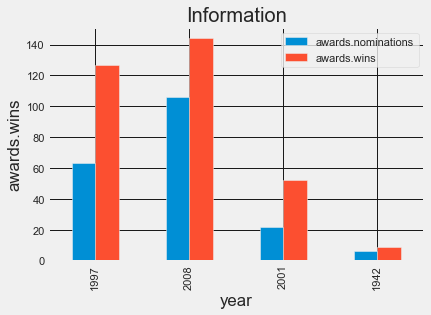

In [3]:
# show a bar graph illustrates awards.nomination ,award.wins by year
import pandas as pd
import  pysd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
films= pd.read_csv("datasets/movies.csv",index_col=0)
df= films.head()
df= df.set_index(["year"])
df.plot(kind="bar")
plt.legend()
plt.xlabel('year')
plt.ylabel('awards.wins')
plt.title('Information')
plt.legend()
plt.grid(True,color='k')
plt.show()

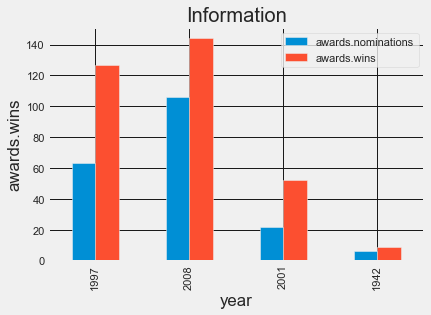

                        _id  awards.nominations  \
0  61636ec15dae1c1507e1f172                  63   
1  61636ec15dae1c1507e1f173                 106   
2  61636ec15dae1c1507e1f174                  22   
3  61636ec15dae1c1507e1f175                   6   

                                         awards.text  awards.wins  \
0  Won 11 Oscars. Another 116 wins & 63 nominations.          127   
1  Won 2 Oscars. Another 142 wins & 106 nominations.          144   
2     Won 1 Oscar. Another 51 wins & 22 nominations.           52   
3      Won 3 Oscars. Another 6 wins & 6 nominations.            9   

                                                cast              directors  \
0  ["Leonardo DiCaprio","Kate Winslet","Billy Zan...      ["James Cameron"]   
1  ["Christian Bale","Heath Ledger","Aaron Eckhar...  ["Christopher Nolan"]   
2  ["Rumi Hiiragi","Miyu Irino","Mari Natsuki","T...     ["Hayao Miyazaki"]   
3  ["Humphrey Bogart","Ingrid Bergman","Paul Henr...     ["Michael Curtiz"]   

  

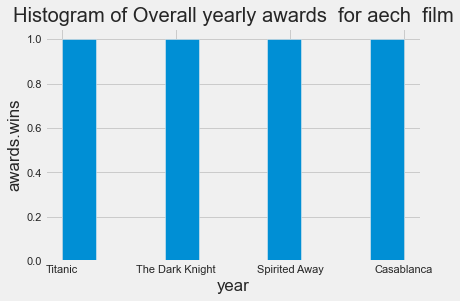

In [2]:
df = pd.read_csv("datasets/movies.csv")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print(df.head())
plt.hist(df['title'])
plt.xlabel('year')
plt.ylabel('awards.wins')
plt.autumn()
plt.ion()
plt.boxplot
plt.cool()
plt.title('Histogram of Overall yearly awards  for aech  film')
plt.show()

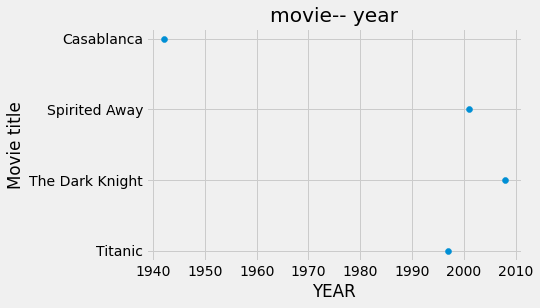

In [27]:
 #let's show the films by their year in scatter design
plt.scatter(df['year'], df['title'])

plt.title('movie-- year')

plt.ylabel('Movie title')

plt.xlabel('YEAR')

plt.show()

c:\users\haithem mihoubi\pycharmprojects\pythonproject\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


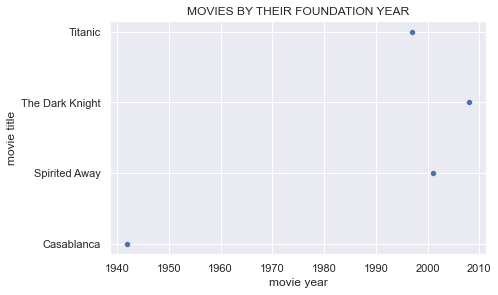

In [44]:
 #let's show the films by their year with seaborn
import seaborn as sns
sns.set()
sns.scatterplot(df['year'], df['title'])

plt.title('MOVIES BY THEIR FOUNDATION YEAR')

plt.ylabel('movie title')

plt.xlabel('movie year')

plt.show()

In [8]:
raw_data=pd.read_csv('datasets/movies.csv')
#let's run all the data
raw_data
#runs the first 5 rows
raw_data.head()

,_id,awards.nominations,awards.text,awards.wins,cast,directors,genres,languages,lastupdated,rated,released,title,year
0,61636ec15dae1c1507e1f172,63,Won 11 Oscars. Another 116 wins & 63 nominations.,127,"[""Leonardo DiCaprio"",""Kate Winslet"",""Billy Zan...","[""James Cameron""]","[""Drama"",""Romance""]","[""English"",""French"",""German"",""Swedish"",""Italia...",NaN,PG-13,1997-12-19T00:00:00.000Z,Titanic,1997
1,61636ec15dae1c1507e1f173,106,Won 2 Oscars. Another 142 wins & 106 nominations.,144,"[""Christian Bale"",""Heath Ledger"",""Aaron Eckhar...","[""Christopher Nolan""]","[""Action"",""Crime"",""Drama""]","[""English"",""Mandarin""]",NaN,PG-13,2008-07-18T00:00:00.000Z,The Dark Knight,2008
2,61636ec15dae1c1507e1f174,22,Won 1 Oscar. Another 51 wins & 22 nominations.,52,"[""Rumi Hiiragi"",""Miyu Irino"",""Mari Natsuki"",""T...","[""Hayao Miyazaki""]","[""Animation"",""Adventure"",""Family""]","[""Japanese""]",NaN,PG,2003-03-28T00:00:00.000Z,Spirited Away,2001
3,61636ec15dae1c1507e1f175,6,Won 3 Oscars. Another 6 wins & 6 nominations.,9,"[""Humphrey Bogart"",""Ingrid Bergman"",""Paul Henr...","[""Michael Curtiz""]","[""Drama"",""Romance"",""War""]","[""English"",""French"",""German"",""Italian""]",2015-09-04 00:22:54.600000000,PG,1943-01-23T00:00:00.000Z,Casablanca,1942


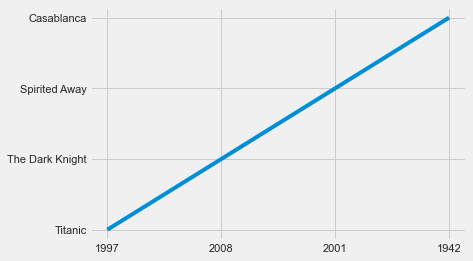

In [16]:
plt.plot(raw_data["title"],)
plt.xticks(range(0, len(raw_data["title"])),raw_data["year"])
plt.show()

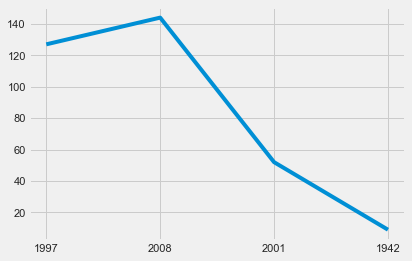

In [32]:
# yearly films by the awards wins
a=raw_data.tail(10)
plt.plot(a["awards.wins"],)
plt.xticks(range(0, len(raw_data["title"])),raw_data["year"])
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


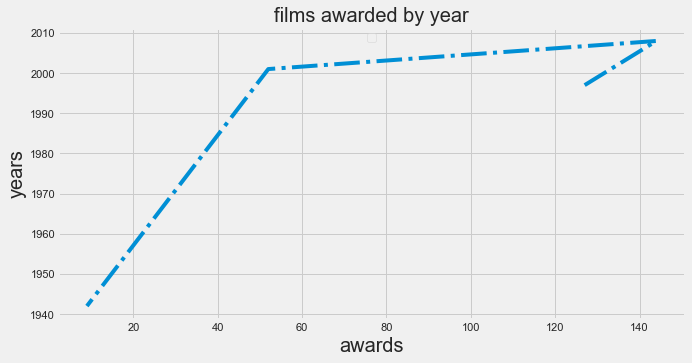

In [52]:
a=raw_data.tail(10)
plt.figure(figsize=(10,5))
#project teh awarded wins with  a new linestyle
plt.plot(a["awards.wins"],a["year"],linestyle="-.")
#title mustbe with  fontsize 20
plt.title("films awarded by year",fontsize=20)
plt.legend(loc="upper center")
plt.xlabel("awards",fontsize=20)
plt.ylabel("years",fontsize=20)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


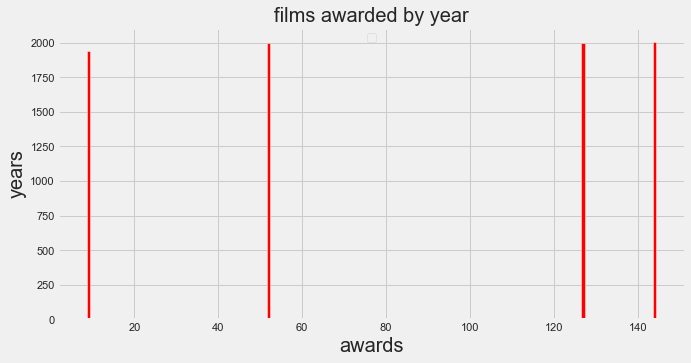

In [70]:
a=raw_data.tail(10)
plt.figure(figsize=(10,5))
#project teh awarded wins with  a new linestyle
plt.bar(a["awards.wins"],a["year"],color="red")
#title mustbe with  fontsize 20
plt.title("films awarded by year",fontsize=20)
plt.legend(loc="upper center")
plt.xlabel("awards",fontsize=20)
plt.ylabel("years",fontsize=20)
plt.show()

In [73]:
# Let's import a new dataset from The famous  NETFLIX
netflix_data=pd.read_csv('datasets/Netflix Dataset.csv')

In [74]:
netflix_data.head()


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [75]:
netflix_data.tail()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
7784,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7785,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7786,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7787,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7788,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [76]:
netflix_data.shape

(7789, 11)

In [77]:
netflix_data.size


85679

In [78]:
netflix_data.columns

Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')

In [79]:
netflix_data.dtypes


Show_Id         object
Category        object
Title           object
Director        object
Cast            object
Country         object
Release_Date    object
Rating          object
Duration        object
Type            object
Description     object
dtype: object

In [80]:
netflix_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [85]:
netflix_data.duplicated()
#check fo  duplicated rows
netflix_data[netflix_data.duplicated()]
#drop the duplicate records
netflix_data.drop_duplicates(inplace=True)
#check that are removed
netflix_data[netflix_data.duplicated()]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description


<AxesSubplot:>

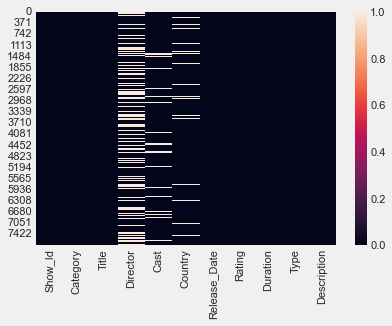

In [90]:
#show null values
netflix_data.isnull()
#count all the null values
netflix_data.isnull().sum()
import  seaborn as sns
sns.heatmap(netflix_data.isnull())


In [100]:
# Method ONE
show=netflix_data[netflix_data['Title'].isin(["House of Cards"])]
print("the show id is,",show["Show_Id"],"The director is",show["Director"])


the show id is, 2832    s2833
Name: Show_Id, dtype: object The director is 2832    Robin Wright, David Fincher, Gerald McRaney, J...
Name: Director, dtype: object


In [103]:
show=netflix_data[netflix_data["Title"].str.contains("House of Cards")]
print("the show id is,",show["Show_Id"],"The director is",show["Director"])

the show id is, 2832    s2833
Name: Show_Id, dtype: object The director is 2832    Robin Wright, David Fincher, Gerald McRaney, J...
Name: Director, dtype: object


2019.0    2153
2020.0    2009
2018.0    1685
2017.0    1225
2016.0     443
2021.0     117
2015.0      88
2014.0      25
2011.0      13
2013.0      11
2012.0       3
2008.0       2
2009.0       2
2010.0       1
Name: Date_N, dtype: int64


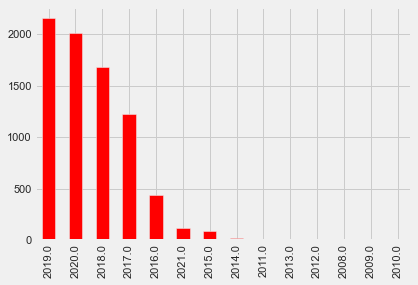

In [110]:
#show in a bar graph
#convert the datetime
netflix_data.dtypes
#convert the object of date to datetime by creating new column
netflix_data['Date_N']=pd.to_datetime(netflix_data["Release_Date"])
# check for the new column
netflix_data.dtypes
#get the value
highestyear=netflix_data['Date_N'].dt.year.value_counts()
print(highestyear)
#show the results in bar chart
highestyear=netflix_data['Date_N'].dt.year.value_counts().plot(kind='bar',color="red")

<AxesSubplot:xlabel='Category'>

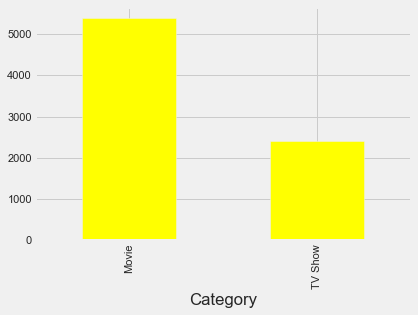

In [118]:
#group all unique items of a column and show their count
netflix_data.groupby("Category").Category.count()
#show with bargraph
netflix_data.groupby("Category").Category.count().plot(kind='bar',color="yellow")


c:\users\haithem mihoubi\pycharmprojects\pythonproject\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Category', ylabel='count'>

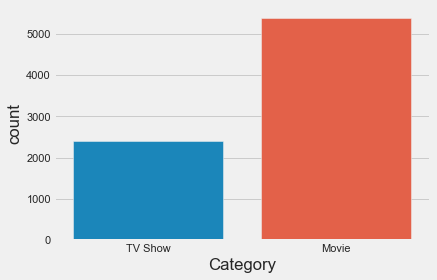

In [117]:
#OR we can user the countplot from seaborn library
sns.countplot(netflix_data["Category"])

<AxesSubplot:>

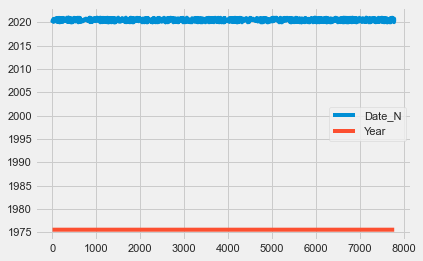

In [126]:
netflix_data.head(1)
#create a new year column because the date is copounded
netflix_data["Year"]=netflix_data["Date_N"].dt.year
netflix_data.head(1)
#filter the movies
netflix_data[(netflix_data["Category"]=="Movie")&(netflix_data["Year"]==2020 )]

In [130]:
netflix_data.head(2)
netflix_data[(netflix_data['Category']=="TV Show")&(netflix_data['Country']=="Mexico")]["Title"]

12                                1994
800                 Becoming Champions
1437                     Club of Crows
1490                         Control Z
1534          Crime Diaries: Night Out
1535      Crime Diaries: The Candidate
1594                             Dandy
1613                       Dark Desire
1742                          Diablero
1949                          El Chavo
1955    El Dragón: Return of a Warrior
2894                          I Am Me!
2998                      Ingobernable
3228                        Juana Inés
3501                         La Piloto
3505              La Rosa de Guadalupe
3572                      Legend Quest
3573     Legend Quest: Masters of Myth
3691            Lo que la vida me robó
3815          Luis Miguel - The Series
4134                     Miss Dynamite
4173                           Monarca
5124                           Rebelde
5284                   Rosario Tijeras
5293                              Rubi
6024                     

In [132]:
netflix_data['Director'].value_counts().head(10)


Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Youssef Chahine           12
Martin Scorsese           12
Steven Spielberg          10
David Dhawan               9
Hakan Algül                8
Name: Director, dtype: int64

In [137]:
netflix_data.head(2)
netflix_data[(netflix_data['Category']=="Movie")&(netflix_data["Type"]=="Comedies")]
netflix_data[(netflix_data['Category']=="Movie")&(netflix_data["Type"]=="Comedies")|(netflix_data["Country"]=="United Kingdom")]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_N,Year
19,s20,Movie,'89,NaN,"Lee Dixon, Ian Wright, Paul Merson",United Kingdom,"May 16, 2018",TV-PG,87 min,Sports Movies,"Mixing old footage with interviews, this is th...",2018-05-16,2018.0
33,s34,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017-09-08,2017.0
58,s59,TV Show,100% Hotter,NaN,"Daniel Palmer, Melissa Sophia, Karen Williams,...",United Kingdom,"November 1, 2019",TV-14,1 Season,"British TV Shows, International TV Shows, Real...","A stylist, a hair designer and a makeup artist...",2019-11-01,2019.0
72,s73,Movie,17 Again,Burr Steers,"Zac Efron, Leslie Mann, Matthew Perry, Thomas ...",United States,"January 1, 2021",PG-13,102 min,Comedies,"Nearing a midlife crisis, thirty-something Mik...",2021-01-01,2021.0
82,s83,Movie,2036 Origin Unknown,Hasraf Dulull,"Katee Sackhoff, Ray Fearon, Julie Cox, Steven ...",United Kingdom,"December 20, 2018",TV-14,95 min,Sci-Fi & Fantasy,Working with an artificial intelligence to inv...,2018-12-20,2018.0
84,s85,Movie,21 & Over,"Jon Lucas, Scott Moore","Miles Teller, Skylar Astin, Justin Chon, Sarah...",United States,"April 16, 2019",R,93 min,Comedies,Jeff's straight-and-narrow life changes abrupt...,2019-04-16,2019.0
85,s86,TV Show,21 Again,NaN,Laura Morgan,United Kingdom,"July 1, 2020",TV-MA,1 Season,"British TV Shows, Reality TV","In a social experiment, a group of daughters s...",2020-07-01,2020.0
93,s94,Movie,27: Gone Too Soon,Simon Napier-Bell,"Janis Joplin, Jimi Hendrix, Amy Winehouse, Jim...",United Kingdom,"May 1, 2018",TV-MA,70 min,Documentaries,Explore the circumstances surrounding the trag...,2018-05-01,2018.0
148,s149,Movie,A Bad Moms Christmas,"Jon Lucas, Scott Moore","Mila Kunis, Kristen Bell, Kathryn Hahn, Susan ...","United States, China","February 14, 2020",R,104 min,Comedies,"Stressed-out moms Amy, Carla and Kiki are back...",2020-02-14,2020.0
174,s175,Movie,A Futile and Stupid Gesture,David Wain,"Will Forte, Domhnall Gleeson, Martin Mull, Joe...",United States,"January 26, 2018",TV-MA,102 min,Comedies,"In a brief life full of triumph and failure, ""...",2018-01-26,2018.0


In [143]:
netflix_data[netflix_data['Cast']=="Tom Cruise"]
#remouve the null and missing values to
data_new=netflix_data.dropna()
data_new[data_new['Cast'].str.contains("Tom Cruise")]


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_N,Year
3860,s3861,Movie,Magnolia,Paul Thomas Anderson,"Jeremy Blackman, Tom Cruise, Melinda Dillon, A...",United States,"January 1, 2020",R,189 min,"Dramas, Independent Movies","Through chance, human action, past history and...",2020-01-01,2020.0
5071,s5071,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,"July 1, 2019",R,134 min,"Classic Movies, Dramas",A fast-talking yuppie is forced to slow down w...,2019-07-01,2019.0


In [145]:
netflix_data.Rating.unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [147]:
netflix_data[(netflix_data.Category=="Movie")&(netflix_data.Rating=="TV-14")&(netflix_data.Country=="Canada")]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_N,Year
30,s31,Movie,#cats_the_mewvie,Michael Margolis,NaN,Canada,"February 5, 2020",TV-14,90 min,"Documentaries, International Movies",This pawesome documentary explores how our fel...,2020-02-05,2020.0
34,s35,Movie,#Roxy,Michael Kennedy,"Jake Short, Sarah Fisher, Booboo Stewart, Dann...",Canada,"April 10, 2019",TV-14,105 min,"Comedies, Romantic Movies",A teenage hacker with a huge nose helps a cool...,2019-04-10,2019.0
608,s609,Movie,At First Light,Jason Stone,"Stefanie Scott, Theodore Pellerin, Percy Hynes...",Canada,"December 27, 2018",TV-14,91 min,"Dramas, Sci-Fi & Fantasy",After mysterious lights imbue her with extraor...,2018-12-27,2018.0
1506,s1507,Movie,Counterfeiting in Suburbia,Jason Bourque,"Sarah Butler, Larissa Albuquerque, Kayla Walla...",Canada,"July 1, 2018",TV-14,88 min,"Dramas, Thrillers",Two teenagers print counterfeit money in their...,2018-07-01,2018.0
3713,s3714,Movie,Long Time Running,"Jennifer Baichwal, Nicholas de Pencier","Gord Downie, Paul Langlois, Gord Sinclair, Rob...",Canada,"November 12, 2017",TV-14,96 min,"Documentaries, International Movies, Music & M...",This documentary follows the 2016 tour of belo...,2017-11-12,2017.0
3956,s3957,Movie,"Martin Matte: La vie, la mort...eh la la..!",Jean-François Blais,Martin Matte,Canada,"October 14, 2019",TV-14,62 min,Stand-Up Comedy,Quebecois comedy star Martin Matte serves up e...,2019-10-14,2019.0
5336,s5336,Movie,Sadie's Last Days on Earth,Michael Seater,"Morgan Taylor Campbell, Clark Backo, Ricardo H...",Canada,"August 22, 2017",TV-14,94 min,"Comedies, Sci-Fi & Fantasy",High schooler Sadie Mitchell believes the worl...,2017-08-22,2017.0
5393,s5393,Movie,Sardaar ji,Rohit Jugraj,"Diljit Dosanjh, Neeru Bajwa, Mandy Takhar, Jas...",Canada,"December 1, 2017",TV-14,140 min,"Comedies, International Movies, Music & Musicals",When a palatial wedding venue turns out to be ...,2017-12-01,2017.0
6062,s6062,Movie,The Accountant of Auschwitz,Matthew Shoychet,NaN,Canada,"July 1, 2019",TV-14,78 min,"Documentaries, International Movies","Decades after WWII, a former SS officer stands...",2019-07-01,2019.0
7025,s7024,Movie,The Wrong Babysitter,George Mendeluk,"Daphne Zuniga, Seann Gallagher, Lisa Marie Car...",Canada,"June 18, 2019",TV-14,89 min,Thrillers,A widow searches for her missing teenage daugh...,2019-06-18,2019.0


In [152]:
netflix_data.head(2)
netflix_data[(netflix_data.Category=="TV Show")&(netflix_data.Year>2018)&(netflix_data.Rating=="R")]


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_N,Year
6437,s6436,TV Show,The Hateful Eight: Extended Version,Quentin Tarantino,"Samuel L. Jackson, Kurt Russell, Jennifer Jaso...",NaN,"April 25, 2019",R,1 Season,TV Shows,Trapped at a stagecoach stop as a storm rages ...,2019-04-25,2019.0


In [158]:
netflix_data.Duration.unique()
netflix_data[["Minutes",'Unit']]=netflix_data.Duration.str.split(' ',expand=True)
netflix_data.head(3)
netflix_data.Minutes.max()

'99'

In [160]:
data_tvShow=netflix_data[netflix_data['Category']=="TV Show"]
data_tvShow.Country.value_counts().head(1)

United States    705
Name: Country, dtype: int64

In [163]:
netflix_data.sort_values(by="Year",ascending=False).head(2)


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_N,Year,Minutes,Unit
5564,s5564,Movie,Sherlock Holmes,Guy Ritchie,"Robert Downey Jr., Jude Law, Rachel McAdams, M...","United States, Germany, United Kingdom, Australia","January 1, 2021",PG-13,128 min,"Action & Adventure, Comedies",The game is afoot for an eccentric detective w...,2021-01-01,2021.0,128,min
5919,s5919,Movie,Surf's Up,"Ash Brannon, Chris Buck","Shia LaBeouf, Jeff Bridges, Zooey Deschanel, J...",United States,"January 1, 2021",PG,86 min,"Children & Family Movies, Comedies, Sports Movies",This Oscar-nominated animated comedy goes behi...,2021-01-01,2021.0,86,min


In [ ]:
netflix_data[ (netflix_data.Category=="Movie")&(netflix_data.Type=="Dramas") ]
